<a href="https://colab.research.google.com/github/Narasimhan-G/DataHack-by-IIT-Guwahati-and-Geeks-for-Geeks/blob/main/Summer_analytics_gfg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello world")

Hello world


In [50]:
#Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random



In [3]:
#Initial inspection
trains = pd.read_csv('/content/training_set_features.csv')
trains.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
#EDA
trains.shape

(26707, 36)

In [5]:
trains.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
trains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
trains.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [8]:
trains.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [9]:
print(trains['employment_occupation'].unique())
print(trains['employment_industry'].unique())

[nan 'xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' 'xqwwgdyp' 'ccgxvspp'
 'qxajmpny' 'kldqjyjy' 'mxkfnird' 'hfxkjkmi' 'bxpfxfdn' 'ukymxvdu'
 'cmhcxjea' 'haliazsg' 'dlvbwzss' 'xzmlyyjv' 'oijqvulv' 'rcertsgn'
 'tfqavkke' 'hodpvpew' 'uqqtjvyb' 'pvmttkik' 'dcjcmpih']
[nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans']


In [10]:
#DATA PREPROCESSING
#Finding the missing values
msv = trains.isna().sum()
msv

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

<Axes: >

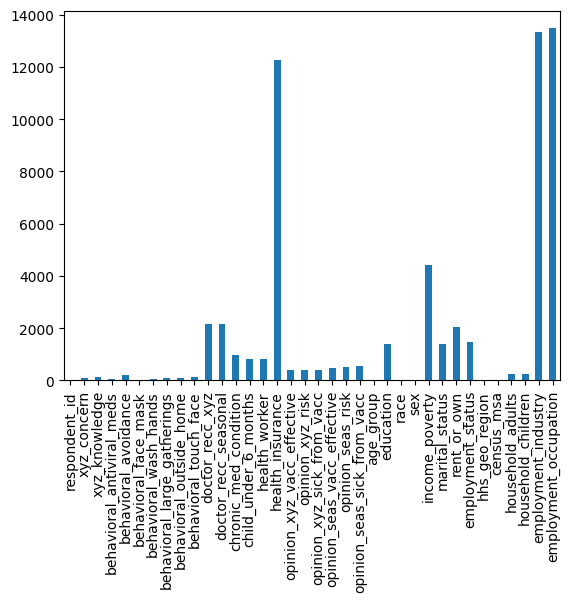

In [11]:
#Plot the null values to check what are all the columns with largenumber of NaN values
msv.plot(kind = 'bar')



In [12]:
#Handling null values
catcols = [col for col in trains.columns if trains[col].dtype =='object']
catcols

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [13]:
#Filling the null values with mode for categorical columns
for col in catcols:
  mode = trains[col].mode()[0]
  trains[col].fillna(mode,inplace = True)


In [14]:
#Filtering the null columns with integer/float values
intcols = [col for col in trains.columns if trains[col].dtype=='float64' or trains[col].dtype=='float64']
intcols

['xyz_concern',
 'xyz_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_xyz',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_xyz_vacc_effective',
 'opinion_xyz_risk',
 'opinion_xyz_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [15]:
#Filling the null values with mean for integer and float columns
for cols in intcols:
  mean = trains[cols].mean()
  trains[cols].fillna(mean,inplace = True)

In [16]:
trains.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [17]:
trains.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [18]:
print(trains.age_group.unique())
print(trains.education.unique())
print(trains.income_poverty.unique())

['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
['< 12 Years' '12 Years' 'College Graduate' 'Some College']
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']


In [19]:
#Data Encoding
#Using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [20]:
#Encoding age group column
oe1 = OrdinalEncoder(categories = ['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'])
trains['age_group'] = oe.fit_transform(trains[['age_group']])


In [21]:
#Encoding education column
oe2 = OrdinalEncoder(categories = ['< 12 Years','12 Years','Some college','College graduate'])
trains['education'] = oe.fit_transform(trains[['education']])

In [22]:
#Encoding income poverty column
oe3 = OrdinalEncoder(categories = ['Below Poverty','<= $75,000, Above Poverty','> $75,000'])
trains['income_poverty'] = oe.fit_transform(trains[['income_poverty']])


In [23]:
#Label encoding the object columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
objcols = [col for col in trains.columns if trains[col].dtype == 'object']
for col in objcols:
  trains[col] = le.fit_transform(trains[col])

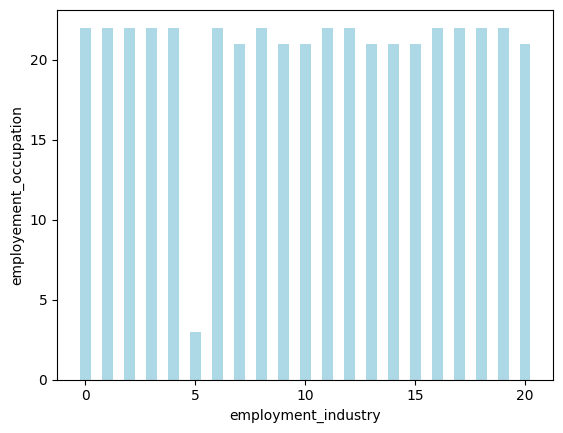

In [25]:
plt.bar(trains['employment_industry'],trains['employment_occupation'], width = 0.5, color = 'lightblue')
plt.xlabel('employment_industry')
plt.ylabel('employement_occupation')
plt.show()

<Axes: >

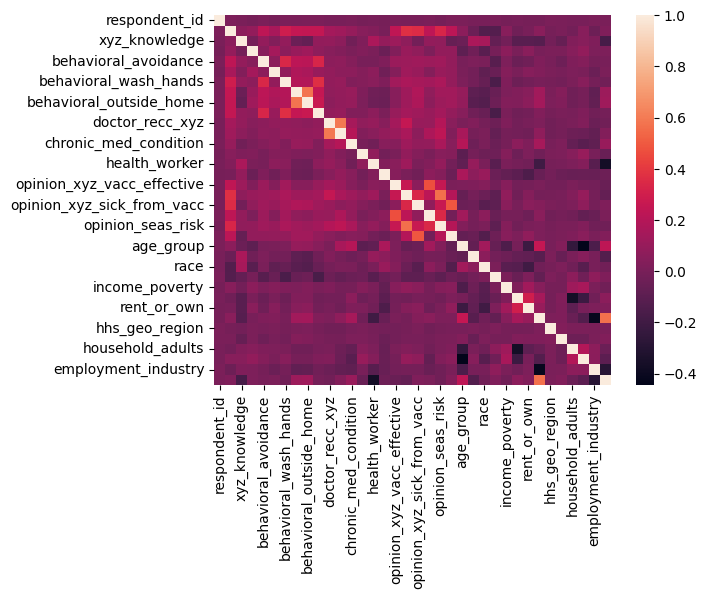

In [26]:
#Feature engineering
#Finding the correlation between the features
corr = trains.corr()
sns.heatmap(corr)

In [27]:
#Reading the labels
trlabel = pd.read_csv('/content/training_set_labels.csv')
trlabel.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [28]:
trlabel.drop(columns = ['respondent_id'],axis = 1, inplace  = True)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trains,trlabel, test_size = 0.2, random_state = 42)

In [30]:
#Building the models- importing
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [99]:
#Logistic regression
lr = LogisticRegression(random_state = 42)

#multiple output classifier
mclf = MultiOutputClassifier(lr, n_jobs= -1)
mclf.fit(X_train, y_train)
y_pred = mclf.predict_proba(X_test)
#Flattening the output to match the label
y_pred = pd.DataFrame({
    col: y_pred[i][:, 1]
    for i, col in enumerate(trlabel.columns)
})

In [32]:
#Calculating the roc_auc curve score
from sklearn.metrics import roc_auc_score
for col in trlabel:
  rocaucscore = roc_auc_score(y_test[col],y_pred[col])
  print(f"ROC-AUC Score for {col}: {rocaucscore:.4f}")


ROC-AUC Score for xyz_vaccine: 0.7452
ROC-AUC Score for seasonal_vaccine: 0.8049


In [33]:
#Random forest classifier
rf = RandomForestClassifier(random_state = 42)

#multiple output classifier
mclf = MultiOutputClassifier(rf, n_jobs= -1)
mclf.fit(X_train, y_train)
y_pred = mclf.predict_proba(X_test)
#Flattening the output to match the label
y_pred = pd.DataFrame({
    col: y_pred[i][:, 1]
    for i, col in enumerate(trlabel.columns)
})

In [34]:
#Calculating the roc_auc curve score
from sklearn.metrics import roc_auc_score
for col in trlabel:
  rocaucscore = roc_auc_score(y_test[col],y_pred[col])
  print(f"ROC-AUC Score for {col}: {rocaucscore:.4f}")

ROC-AUC Score for xyz_vaccine: 0.8643
ROC-AUC Score for seasonal_vaccine: 0.8573


In [35]:
%pip install xgboost

In [36]:
import xgboost as xgb

xgbclf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#multiple output classifier
mclf = MultiOutputClassifier(xgbclf, n_jobs= -1)
mclf.fit(X_train, y_train)
y_pred = mclf.predict_proba(X_test)
#Flattening the output to match the label
y_pred = pd.DataFrame({
    col: y_pred[i][:, 1]
    for i, col in enumerate(trlabel.columns)
})

In [37]:
for col in trlabel:
  rocaucscore = roc_auc_score(y_test[col],y_pred[col])
  print(f"ROC-AUC Score for {col}: {rocaucscore:.4f}")

ROC-AUC Score for xyz_vaccine: 0.8526
ROC-AUC Score for seasonal_vaccine: 0.8526


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)

In [43]:
mclf = MultiOutputClassifier(gb, n_jobs = -1)
mclf.fit(X_train, y_train)
y_pred = mclf.predict_proba(X_test)

#flattening the values to match the label
y_pred = pd.DataFrame({
    col: y_pred[i][:,1]
    for i, col in enumerate(trlabel.columns)
})
for col in trlabel:
  rocaucscore = roc_auc_score(y_test[col],y_pred[col])
  print(f"ROC-AUC Score for {col}: {rocaucscore:.4f}")

ROC-AUC Score for xyz_vaccine: 0.8697
ROC-AUC Score for seasonal_vaccine: 0.8652


In [44]:
#Using gridsearchCV for tuning hyperparameters
from sklearn.model_selection import GridSearchCV


In [46]:
#Using GridsearchCV on logistic regression
lr = LogisticRegression(random_state = 42)

#multiple output classifier
mclf = MultiOutputClassifier(lr, n_jobs= -1)
param_grid = {
    'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2'],  # Note: 'l1' requires solver='liblinear' or 'saga'
    'estimator__solver': ['liblinear','saga']   # Specify solver to handle l1 penalty
}

#GridsearchCV
clf = GridSearchCV(mclf,param_grid = param_grid, cv = 5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
#best parameter fetching
best_params = clf.best_params_
best_model = clf.best_estimator_
print(f"Best Parameters: {best_params}")

Best Parameters: {'estimator__C': 100, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}


In [47]:
y_pred = best_model.predict_proba(X_test)

#flattening the output according to the label
y_pred = pd.DataFrame({
    col:y_pred[i][:,1]
    for i, col in enumerate(trlabel.columns)
})

#roc auc score
for col in trlabel:
  rocaucscore = roc_auc_score(y_test[col],y_pred[col])
  print(f"ROC-AUC Score for {col}: {rocaucscore:.4f}")


ROC-AUC Score for xyz_vaccine: 0.8308
ROC-AUC Score for seasonal_vaccine: 0.8508


**Testing the model with the given dataset**

In [55]:
#Reading the actual test data
df_test = pd.read_csv('/content/test_set_features.csv')
df_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


<Axes: >

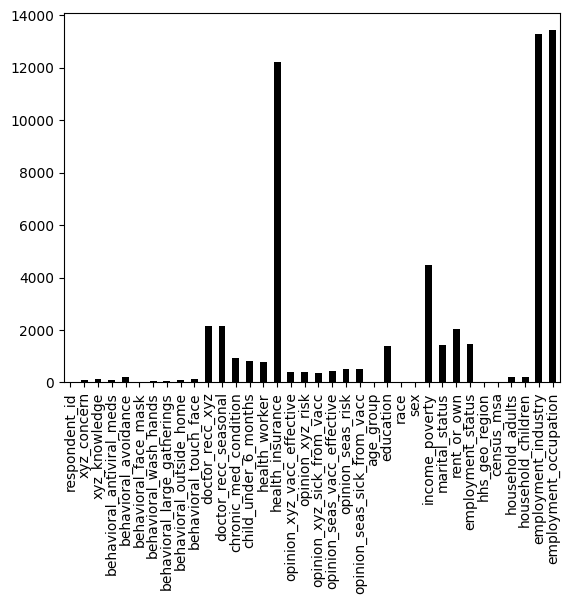

In [59]:
df_test.isna().sum().plot(kind = 'bar',color = 'black')

In [57]:
df_test.shape

(26708, 36)

In [72]:
#Preprocessing the test data
#Handling null values
cat = [col for col in df_test.columns if df_test[col].dtype =='object']
#Filling the null values with mode for categorical columns
for col in catcols:
  mode = df_test[col].mode()[0]
  df_test[col].fillna(mode,inplace = True)

print(cat)

['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [70]:
df_test.dtypes

respondent_id                    int64
xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [85]:
#Filtering the null columns with integer/float values
int = [col for col in df_test.columns if df_test[col].dtype=='int64' or df_test[col].dtype=='float64']

#Filling the null values with mean for integer and float columns
for cols in intcols:
  mean = df_test[cols].mean()
  df_test[cols].fillna(mean,inplace = True)


In [86]:
df_test.isna().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [87]:
#Data Encoding
#Using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
#Encoding age group column
oe1 = OrdinalEncoder(categories = ['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'])
df_test['age_group'] = oe.fit_transform(df_test[['age_group']])
#Encoding education column
oe2 = OrdinalEncoder(categories = ['< 12 Years','12 Years','Some college','College graduate'])
df_test['education'] = oe.fit_transform(df_test[['education']])
#Encoding income poverty column
oe3 = OrdinalEncoder(categories = ['Below Poverty','<= $75,000, Above Poverty','> $75,000'])
df_test['income_poverty'] = oe.fit_transform(df_test[['income_poverty']])


In [88]:
#Label encoding the object columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
objcols = [col for col in df_test.columns if df_test[col].dtype == 'object']
for col in objcols:
  df_test[col] = le.fit_transform(df_test[col])

<Axes: >

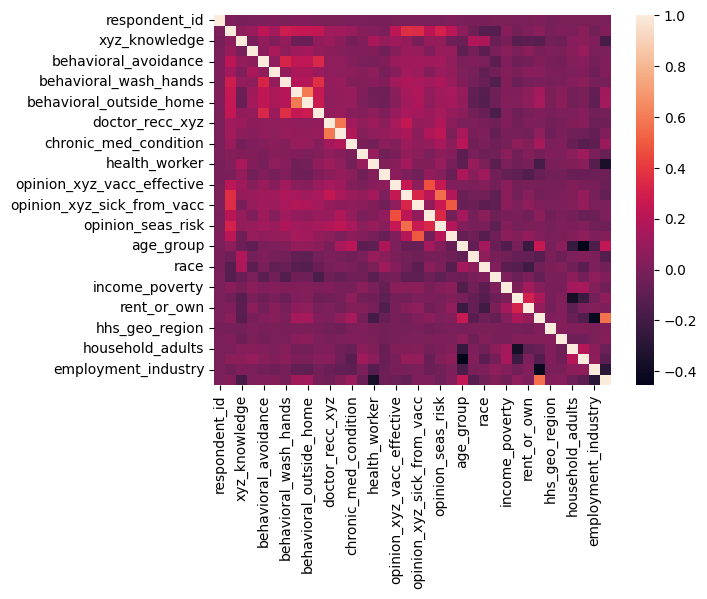

In [90]:
#Feature engineering
#Finding the correlation between the features
corr = df_test.corr()
sns.heatmap(corr)

**Building the model**

In [93]:
#Gradient Boosting method
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)

In [101]:
clff = MultiOutputClassifier(gb,n_jobs=-1)
clff.fit(X_train, y_train)
y_pred = clff.predict_proba(df_test)

#flattening the output to frame according to the label
y_pred_final = pd.DataFrame({
    col : y_pred[i][:,1]
    for i, col in enumerate(trlabel.columns)
})

In [102]:
y_pred_final

,xyz_vaccine,seasonal_vaccine
0,0.142327,0.265958
1,0.029413,0.024054
2,0.149702,0.685635
3,0.544972,0.624828
4,0.308313,0.454461
...,...,...
26703,0.183934,0.467888
26704,0.099336,0.276028
26705,0.157993,0.167590
26706,0.040412,0.191571


In [107]:
y_pred_final.set_index(df_test['respondent_id'], inplace = True)

In [108]:
y_pred_final.to_csv('SAgfgHackathon.csv')

In [ ]:
from google.colab import drive
drive.mount('drive')